In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv("IRIS.csv")
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

### Exploratory Data Analysis

In [48]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [49]:
df.shape

(150, 5)

In [50]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [51]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [52]:
df.isnull()

sepal_length  sepal_width  petal_length  petal_width  species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]

In [53]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [54]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

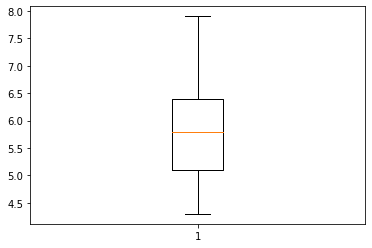

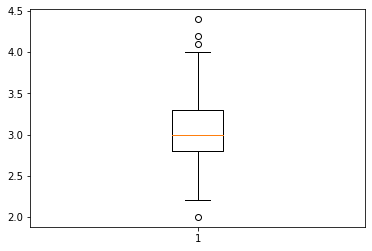

In [55]:
plt.figure(1)
plt.boxplot([df['sepal_length']])
plt.figure(2)
plt.boxplot([df['sepal_width']])
plt.show()

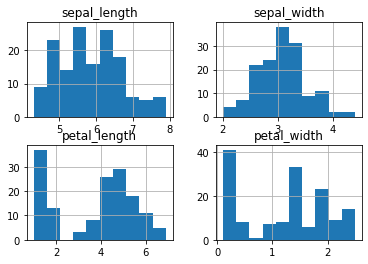

<Figure size 720x504 with 0 Axes>

In [56]:
df.hist()
plt.figure(figsize=(10,7))
plt.show()

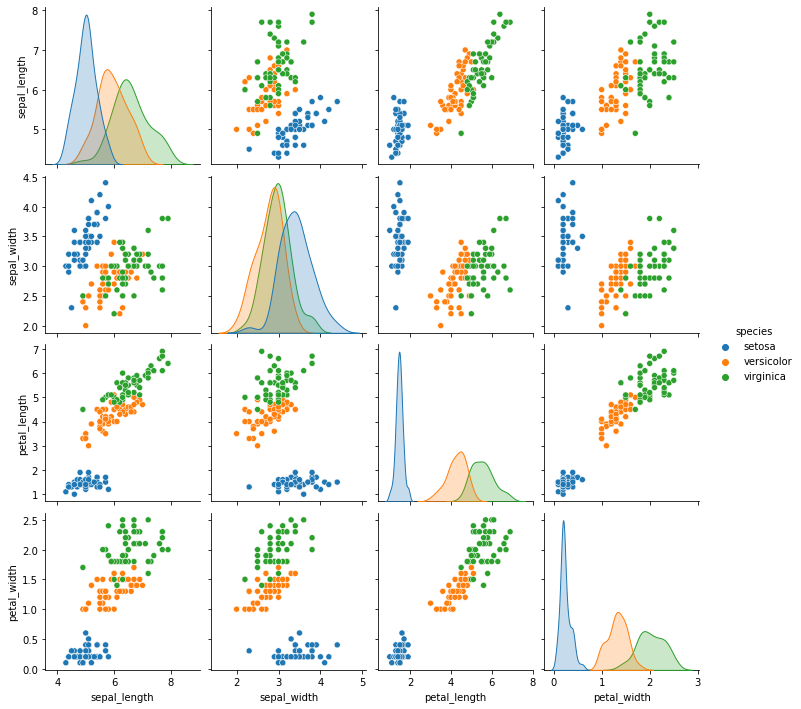

In [57]:
sns.pairplot(df,hue='species')

In [58]:
X = df.drop(['species'],axis=1)
Y = df['species']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=43)

In [60]:
X_train.shape

(90, 4)

In [61]:
Y_train.shape

(90,)

In [62]:
X_train

sepal_length  sepal_width  petal_length  petal_width
92            5.8          2.6           4.0          1.2
4             5.0          3.6           1.4          0.2
9             4.9          3.1           1.5          0.1
54            6.5          2.8           4.6          1.5
102           7.1          3.0           5.9          2.1
..            ...          ...           ...          ...
58            6.6          2.9           4.6          1.3
21            5.1          3.7           1.5          0.4
49            5.0          3.3           1.4          0.2
64            5.6          2.9           3.6          1.3
68            6.2          2.2           4.5          1.5

[90 rows x 4 columns]

In [63]:
Y_train

92     versicolor
4          setosa
9          setosa
54     versicolor
102     virginica
          ...    
58     versicolor
21         setosa
49         setosa
64     versicolor
68     versicolor
Name: species, Length: 90, dtype: object

### KNN Classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.9333333333333333
